# Reviews Solicitation
---
## Multinomial Data - Multi-level Ratings
### Analysis
Suppose that users can rate $1, 2, \ldots,$ or $k$ stars for each product's attribute, i.e. $k$ categories. Notate $(x_1, x_2, \ldots, x_k)$ as above categories' counts, $n = \Sigma {x_i}$. Our main interest is vector $p = (p_1, p_2, \ldots, p_k)$ that represents the probability (degree of belief) that users rate $1, 2, \ldots, k$ stars respectively. 

Suppose the prior distribution for $p = (p_1, p_2, \ldots, p_k)$ is Dirichlet of order $k \geq 2$ with parameters $\alpha_1, \alpha_2, \ldots, \alpha_k > 0$:
$$g(p) = \frac{1}{B(\alpha)} \prod_{i=1}^{k} p_i^{\alpha_i - 1}$$
and the likelihood $f(x | p)$ is multinomial distribution:
$$f(x|p) = \frac{n!}{x_1! \ldots x_k!} \prod_{i=1}^{k} p_i^{x_i}$$

Therefore we have the posterior:
$$h(p|x) \varpropto f(x|p)g(p) = \frac{n!}{x_1! \ldots x_k!} \times \frac{1}{B(\alpha)} \times \prod_{x=1}^{k} p_i^{x_i + \alpha_i - 1}$$
This is also a Dirichlet distribution with parameter $(x_1 + \alpha_1, \ldots, x_k + \alpha_k)$ that have the mean:
$$E[p_i|x] = \frac{x_i + \alpha_i}{\Sigma_{i=1}^{k} {(x_i + \alpha_i)} }$$
and variance:
$$Var[p_i|x] = \frac{\alpha_i(\alpha_0 - \alpha_i)}{\alpha_0^2(\alpha_0 + 1)}$$
where $\alpha_0 = \Sigma_{i=1}^{k} \alpha_i$, and co-variance:
$$Cov[p_i, p_j|x] = \frac{-\alpha_i \alpha_j}{\alpha_0^2(\alpha^0 + 1)}$$

For our purpose, we can consider the attribute that have small $\min_i Var[p_i|x]$ to be stable. In another word, asking incoming users about an attribute that maximize $\min_i Var[p_i|x]$.

### Toy example
Consider 2 cell phone traits again: **cost** and **screen**. This time, users can rate with $1, 2$ or $3$ stars. Suppose $p_c^1, p_c^2$ and $p_c^3$ are the probabilities of rating the cost with $1, 2$ and $3$ stars, $p_c^1 + p_c^2 + p_c^3 = 1$. Similarly, we have $p_s^1, p_s^2$ and $p_s^3$ for screen. Again, we do Bayesian inference for $p_c^i$ and $p_s^i$ with uniform prior, or Dirichlet distribution with all $\alpha_i$ to be the same $\alpha_i = \alpha = 1$.

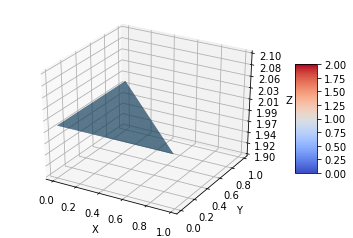

In [163]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import scipy.stats as stats
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def dirichlet_coord(a1, a2, a3):
    dist = stats.dirichlet
    x, y = np.mgrid[0.01:1:0.01, 0.01:1:0.01]
    x = x.flatten()
    y = y.flatten()
    xy = x + y
    xy_bool_idx = xy < 1
    x = x[xy_bool_idx]
    y = y[xy_bool_idx]
    xy_remain = 1 - (x + y)
    z = [dist.pdf([x[i], y[i], xy_remain[i]], [a1, a2, a3]) for i in range(len(x))]
    z = np.array(z)
    return (x, y, z)

def get_ax():
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    return ax

ax = get_ax()
x, y, z = dirichlet_coord(1, 1, 1)
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

We suppose that we have 5, 10, 50 ratings of 1, 2, 3 stars respectively for cost and 2, 4, 8 ratings of 1, 2, 3 stars respectively for screen. Then the posterior of the cost $h(p_c|x)$ and screen $h(p_s|x)$ are respectively Dirichlet(6, 11, 51) and Dirichlet(3, 5, 9). Consider variance for the cost:
$$\alpha_0 = \Sigma \alpha_i = 6 + 11 + 51 = 68$$
$$Var[p_c^1|x] = \frac{\alpha_1(\alpha_0 - \alpha_1)}{\alpha_0^2(\alpha_0 + 1)}=\frac{6\times 62}{68^2 \times 69} = 0.0012$$
$$Var[p_c^2|x] = \frac{\alpha_2(\alpha_0 - \alpha_2)}{\alpha_0^2(\alpha_0 + 1)}=\frac{11\times 57}{68^2 \times 69} = 0.0020$$
$$Var[p_c^3|x] = \frac{\alpha_3(\alpha_0 - \alpha_3)}{\alpha_0^2(\alpha_0 + 1)}=\frac{51\times 17}{68^2 \times 69} = 0.0027$$

Similarly for the screen:
$$\alpha_0 = \Sigma \alpha_i = 3 + 5 + 9 = 17$$
$$Var[p_s^1|x] = \frac{\alpha_1(\alpha_0 - \alpha_1)}{\alpha_0^2(\alpha_0 + 1)}=\frac{3\times 14}{17^2 \times 18} = 0.0081$$
$$Var[p_s^2|x] = \frac{\alpha_2(\alpha_0 - \alpha_2)}{\alpha_0^2(\alpha_0 + 1)}=\frac{12\times 5}{17^2 \times 18} = 0.0115$$
$$Var[p_s^3|x] = \frac{\alpha_3(\alpha_0 - \alpha_3)}{\alpha_0^2(\alpha_0 + 1)}=\frac{9\times 8}{17^2 \times 18} = 0.0138$$

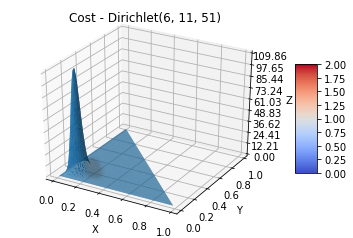

In [165]:
x, y, z = dirichlet_coord(6, 11, 51)
ax = get_ax()
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
plt.title("Cost - Dirichlet(6, 11, 51)")
plt.show()

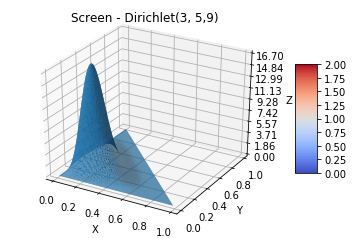

In [166]:
x, y, z = dirichlet_coord(3, 5, 9)
ax = get_ax()
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
plt.title("Screen - Dirichlet(3, 5,9)")
plt.show()